## <center>Описание задачи:</center>

    Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

    Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### <center>Описание датасета</center>

    Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

### Подключаем нужные библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

### Загружаем данные:

In [3]:
# загружаем наш датасет:

data = pd.read_csv('stud_math.csv')
display(data.sample(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
237,GP,F,16,U,NaN,T,2.0,1.0,other,other,home,mother,1.0,1.0,0.0,no,NaN,no,no,yes,-3.0,yes,yes,yes,4.0,5.0,2.0,5.0,20.0,60.0
385,MS,F,18,R,GT3,T,2.0,2.0,at_home,other,other,NaN,NaN,3.0,0.0,no,no,yes,no,yes,-9.0,yes,NaN,no,5.0,3.0,3.0,4.0,2.0,50.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
343,GP,F,17,U,GT3,A,2.0,2.0,at_home,at_home,home,father,1.0,2.0,1.0,no,yes,no,no,yes,-6.0,yes,yes,yes,3.0,3.0,1.0,4.0,0.0,0.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
302,GP,F,17,U,GT3,T,4.0,2.0,other,other,reputation,mother,2.0,3.0,0.0,no,NaN,yes,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,0.0,70.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0
261,GP,M,18,U,GT3,T,4.0,3.0,teacher,other,course,mother,NaN,2.0,NaN,no,yes,yes,no,no,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,2.0,40.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0


In [4]:
display(data.info(verbose=True, null_counts=True)) # проверяем информацию о колонках датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

В описании датасета говорится о 29 колонках, а у нас их 30. Колонка <b><i>studytime, granular</i></b> "лишняя", надо будет разобраться какие данные в ней содержаться.

### <center>"Входной" анализ данных:</center>

В нашем датасете содержится 30 (хотя в описании всего 29) столбцов. Их можно разделить на несколько категорий:
1. Числовые: 3 столбца (age, absences, score)
2. 2 значения: 12 столбцов (sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic). Эти столбцы, после некоторых преобразований, можно считать бинарными.
3. Несколько "фиксированных" значений: 13 столбцов (Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health). Данные стобцы можно рассматривать как категориальные признаки.
4. Остальные значения: school и неизвестный нам столбец "studytime, granular".

In [5]:
# Переименуем столбцы для удобства дальнейшей работы:

data.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)

In [6]:
# проверяем что не забыли какой-нибудь столбец:

display(data.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    object 
 1   sex           395 non-null    object 
 2   age           395 non-null    int64  
 3   address       378 non-null    object 
 4   famsize       368 non-null    object 
 5   p_status      350 non-null    object 
 6   m_edu         392 non-null    float64
 7   f_edu         371 non-null    float64
 8   m_job         376 non-null    object 
 9   f_job         359 non-null    object 
 10  reason        378 non-null    object 
 11  guardian      364 non-null    object 
 12  traveltime    367 non-null    float64
 13  studytime     388 non-null    float64
 14  failures      373 non-null    float64
 15  schoolsup     386 non-null    object 
 16  famsup        356 non-null    object 
 17  paid          355 non-null    object 
 18  activities    381 non-null    

None

### <center>Функции для дальнейшей работы:<center>

In [7]:
# Смотрим на значения в столбце и считаем количество пустых значений:
def quick_analize(df_col):
    display(df_col.value_counts())
    if df_col.isnull().value_counts()[False] != len(data):
        display('В столбце обнаружено {} пустых значений.'.format(
            df_col.isnull().value_counts()[True]))
    else:
        display('В столбце пустых значений не обнаружено.')

### <center>Рассматриваем отдельные столбцы</center>

#### Начнем с числовых признаков:

#### 1. score - баллы по госэкзамену по математике

Наш целевой параметр, так-что анализ начнем с него.

In [8]:
quick_analize(data.score)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

'В столбце обнаружено 6 пустых значений.'

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

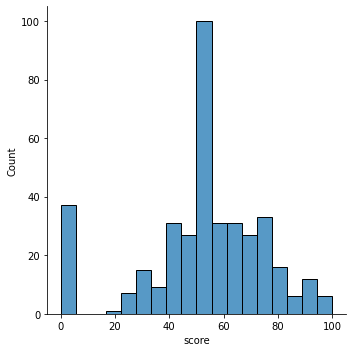

In [9]:
sns.displot(data.score, bins = len(data.score.value_counts()))
data.score.describe()

Судя по данным в столбце при оценке использовалась 100-бальная система. Присутствует 6 пустых значений. Выбросов формально нет, но, по гистограмме видно, что если у нас есть много нулевых значений. Чем вызвано появление нулевых значений мы можем только предполагать, возможно это ошибки в данных, а возможно это ученики, которые просто не пришли на экзамен. В любом случае для нашей модели строки с нулевым значением score будут бесполезны, так-что их придется удалить (хотя их и не мало). Так-же придется поступить и с пустыми значениями.

In [10]:
data = data.loc[data.score > 0]

In [11]:
# проверяем сколько осталось строк в таблице:

len(data)

352

In [12]:
# посмотрим на получившееся распределение score:

data.score.iplot(kind = 'histogram')

Видно что распределение действительно стало "околонормальным" но слегка "приплюснутым". Такое распределение возникает из-за большого стандартного отклонения (std = 16.200928) и достаточно малого числа околомедианных значений.

In [13]:
# Перепроверим что получилось:

quick_analize(data.score)

50.0     54
55.0     46
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

'В столбце пустых значений не обнаружено.'

Мы "очистили" целевую переменную от пропусков и от нулевых значений, но, к сожалению, размер нашего датасета сократился на 43 строки. Больше он (датасет) сокращаться не должен т.к. в остальных переменных мы можем не удалять, а заменять пустые и неправильные значения.

#### 2. age - возраст ученика

In [14]:
quick_analize(data.age)

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

'В столбце пустых значений не обнаружено.'

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

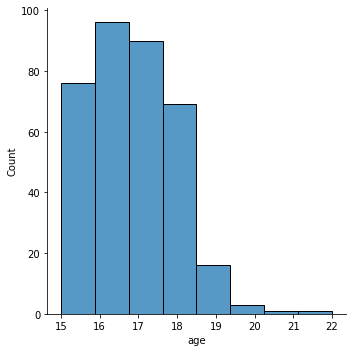

In [15]:
sns.displot(data.age, bins = len(data.age.value_counts()))
data.age.describe()

В данном столбце пропусков нет, а все значения укладываются в ожидаемый диапазон от 15 до 22. Однако у нас всего по одному значению 21 и 22, которые, возможно, являются выбросами.
Проверим это:

Медиана: 17.0 
1-й квартиль: 16.0 
3-й квартиль: 18.0 
Межквартильный размах: 2.0 
Границы выбросов: [13.0, 21.0]


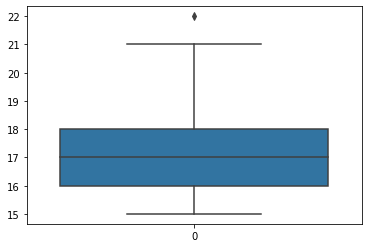

In [16]:
sns.boxplot(data = data.age)
med = data.age.median()
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print('Медиана: {} \n1-й квартиль: {} \n3-й квартиль: {} \nМежквартильный размах: {} \nГраницы выбросов: [{}, {}]'\
      .format(med, Q1, Q3, IQR, (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)))

Видно что выбросом является только значение 22, значени 21 укладывается в диапазон. Однако, по условию задачи, возраст 22 является допустимым, поэтому мы не можем его просто так удалить.

In [17]:
# Посмотрим на распределение возраста подробнее:
data['age'].iplot(kind = 'histogram')

Видно что распределение имеет длинный "хвост" справа, учеников старше 18 лет совсем мало. Пока эта иформация нам ничего не дает, переходим к следующему столбцу.

#### 3. absences - количество пропущенных занятий

In [18]:
quick_analize(data.absences)

0.0      74
2.0      60
4.0      52
6.0      30
8.0      20
10.0     17
12.0     12
14.0     12
3.0       7
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences, dtype: int64

'В столбце обнаружено 10 пустых значений.'

count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

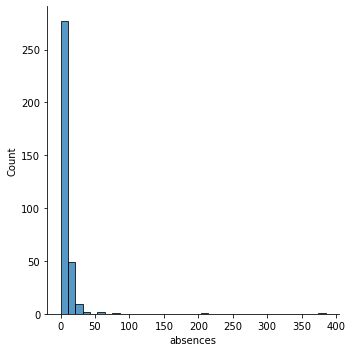

In [19]:
sns.displot(data.absences, bins = len(data.absences.value_counts()))
data.absences.describe()

В данном столбце присутствует слишком много различных значений, некоторые из которых явно являются выбросами. Так-же присутсвует 10 пустых значений.

Медиана: 4.0 
1-й квартиль: 2.0 
3-й квартиль: 8.0 
Межквартильный размах: 6.0 
Границы выбросов: [-7.0, 17.0]


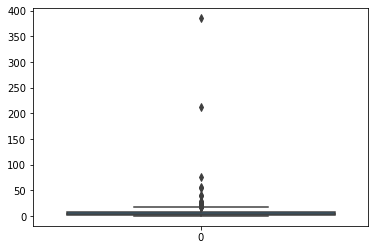

In [20]:
# Проверим наши догадки насчет выбросов:

sns.boxplot(data = data.absences)
med = data.absences.median()
Q1 = data.absences.quantile(0.25)
Q3 = data.absences.quantile(0.75)
IQR = Q3 - Q1
print('Медиана: {} \n1-й квартиль: {} \n3-й квартиль: {} \nМежквартильный размах: {} \nГраницы выбросов: [{}, {}]'\
      .format(med, Q1, Q3, IQR, (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)))

Судя по всему выбросы в данных действительно есть, но совсем не факт что они вызваны ошибками в данных. Возможно, что столь большое количество пропусков вызвано болезнью или каким-либо иным подобным фактом. 
Кроме того мы не знаем сколько всего было занятий, а однозначно считать "аномальным" можно либо отрицательные значения, либо значения превышающие общее число занятий.
По боксплоту видно что у нас есть 2 слишком "оторванных" от остальных значения (больше 200, когда остальные меньше 100). Предлагаю удалить только их, т.к. они могут в дальнейшем повлиять на результаты.

In [21]:
data.loc[data['absences'] >200, 'absences'] = np.nan

<AxesSubplot:>

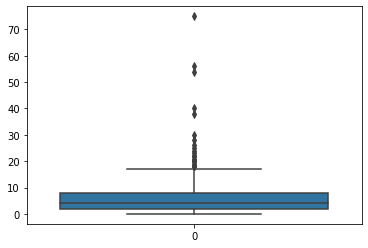

In [22]:
# Смотрим на изменившийся боксплот:

sns.boxplot(data = data.absences)

In [23]:
# Посмотрим на распределение пропусков подробнее:

data['absences'].iplot(kind = 'histogram')

Видно что распределение имеет длинный "хвост" справа. У большинства учеников либо вовсе нет пропусков, либо их количество невелико. После того как мы удалили 2 самых высоких значения в наших данных стало 12 пропусков.

#### Теперь рассмотрим столбцы с неизвестным типом содержимого:

#### 1. school - аббревиатура школы, в которой учится ученик

In [24]:
quick_analize(data.school)

GP    311
MS     41
Name: school, dtype: int64

'В столбце пустых значений не обнаружено.'

В нашем датасете всего 2 типа школ, так-что данный столбец можно отнести к бинарному типу. Кроме того столбец не содержит ни одного пропуска. 

#### 2. studytime_gr - столбец которого нет в описании датасета

In [25]:
quick_analize(data.studytime_gr)

-6.0     173
-3.0      90
-9.0      58
-12.0     24
Name: studytime_gr, dtype: int64

'В столбце обнаружено 7 пустых значений.'

count    345.000000
mean      -6.139130
std        2.522758
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_gr, dtype: float64

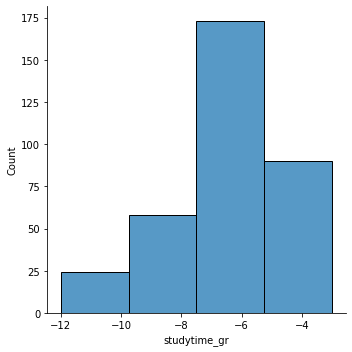

In [26]:
sns.displot(data.studytime_gr, bins = len(data.studytime_gr.value_counts()))
data.studytime_gr.describe()

Столбец содержит значения 4-ех типов и 7 пропусков. Пока мы ничего не можем сказать о том что он означает.

#### Переходим к категориальным признакам:

#### 1. m_edu - образование матери
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [27]:
quick_analize(data.m_edu)

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: m_edu, dtype: int64

'В столбце обнаружено 2 пустых значений.'

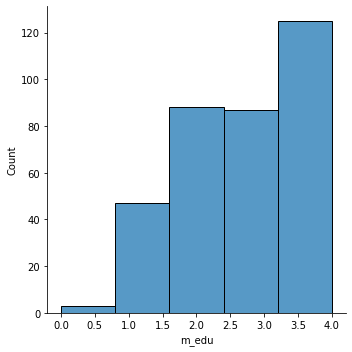

In [28]:
# посмотрим на распределение для данного столбца:

sns.displot(data.m_edu, bins = 5)

Столбец <b><i>m_edu</b></i> содержит 5 различных значений, как в описании. Есть 2 пустых значения. Можно заметить что значение 0 встречается всего 3 раза, но, т.к. по описанию датасета такой вариант допустим, то мы не будем считать его выбросом.

#### 2. f_edu - образование отца
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
quick_analize(data.f_edu)

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: f_edu, dtype: int64

'В столбце обнаружено 21 пустых значений.'

Видно что в датасете есть одно неверное значение: 40. Данное значение является ошибочным, предлагаю его удалить:

In [30]:
data.loc[data['f_edu'] == 40.0, 'f_edu'] = np.nan

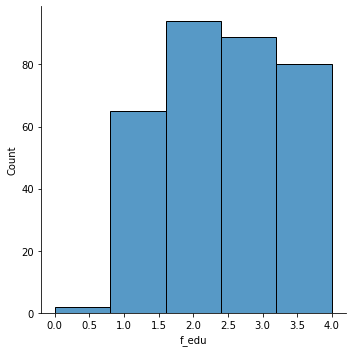

In [31]:
# Посмотрим на получившееся распределение:

sns.displot(data.f_edu, bins = 5)

В столбеце <b><i>f_edu</b></i> присутствовало одно ошибочное значение, которое мы удалили после чего получилось 22 пустых значений. Так-же как и с <b><i>m_edu</b></i> 0 встречается очень редко (2 раза).

#### 3. m_job - работа матери

In [32]:
quick_analize(data.m_job)

other       115
services     90
teacher      51
at_home      49
health       30
Name: m_job, dtype: int64

'В столбце обнаружено 17 пустых значений.'

В столбеце <b><i>m_job</b></i> содержится 5 значений, как в описании. Ошибочных значений нет, но присутсвует 17 пустых значений.

#### 4. f_job - работа отца

In [33]:
quick_analize(data.f_job)

other       176
services     89
teacher      26
health       15
at_home      14
Name: f_job, dtype: int64

'В столбце обнаружено 32 пустых значений.'

Также как и с <b><i>m_job</b></i> столбец <b><i>f_job</b></i> содержит 5 значений. Ошибок в данных нет, но пустых значений стало больше (32).

#### 5. reason - причина выбора школы

In [34]:
quick_analize(data.reason)

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

'В столбце обнаружено 15 пустых значений.'

В столбце <b><i>reason</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 15 пустых значений.

#### 6. guardian — опекун

In [35]:
quick_analize(data.guardian)

mother    225
father     78
other      20
Name: guardian, dtype: int64

'В столбце обнаружено 29 пустых значений.'

В столбце <b><i>guardian</b></i> содержится 3 значения, как в описании. Ошибочных значений нет, присутсвует 29 пустых значений.

#### 7. traveltime - время в пути до школы
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [36]:
quick_analize(data.traveltime)

1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

'В столбце обнаружено 23 пустых значений.'

В столбце <b><i>traveltime</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 23 пустых значений. Можно заметить что бОльшая часть учеников живет недалеко от школы.

#### 8. studytime - время на учёбу помимо школы в неделю 
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [37]:
quick_analize(data.studytime)

2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

'В столбце обнаружено 7 пустых значений.'

In [38]:
# Мы уже видели похожее распределение в столбце studytime_gr. Надо рассмотреть 2 столбца вместе:

data.loc[:,['studytime','studytime_gr']]

,studytime,studytime_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [39]:
# Похоже что столбец studytime_gr это просто studytime, умноженный на -3. 
# Что-бы убедиться в этом, можно проверить корреляцию между ними:

data['studytime'].corr(data['studytime_gr'])

-0.9999999999999998

In [40]:
# Полная обратная корреляция означает что один из столбцов можно спокойно удалить: 

data.drop(['studytime_gr'], inplace = True, axis = 1)

Cтолбец <b><i>studytime</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 7 пустых значений. Помимо этого мы выяснили что неизвестный нам столбец <b><i>studytime_gr</b></i> оказался всего-лишь копией столбца <b><i>studytime</b></i>, умноженной на -3, что позволило нам удалить его.

#### 9. failures — количество внеучебных неудач 
(n, если 1<=n<=3, иначе 0)

In [41]:
quick_analize(data.failures)

0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

'В столбце обнаружено 20 пустых значений.'

В столбце <b><i>failures</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 20 пустых значениq. Можно заметить что у абсолютного большинства учеников неудач нет.

#### 10. famrel - семейные отношения 
(от 1 - очень плохо до 5 - очень хорошо)

In [42]:
quick_analize(data.famrel)

 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

'В столбце обнаружено 24 пустых значений.'

In [43]:
# В столбце famrel обнаружилось одно ошибочное значение (-1), которого нет в описании датасета. Его следует удалить:

data.loc[data['famrel'] == -1.0, 'famrel'] = np.nan

In [44]:
# Проверяем что получилось:
quick_analize(data.famrel)

4.0    163
5.0     88
3.0     56
2.0     14
1.0      6
Name: famrel, dtype: int64

'В столбце обнаружено 25 пустых значений.'

В столбце <b><i>famrel</b></i> содержится 5 значений, как в описании. Присутствовало 1 ошибочное значение (удалено). В столбце 25 пропусков.

#### 11. freetime — свободное время после школы 
(от 1 - очень мало до 5 - очень мого)

In [45]:
quick_analize(data.freetime)

3.0    132
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64

'В столбце обнаружено 8 пустых значений.'

В столбце <b><i>freetime</b></i> содержится 5 значений, как в описании. Ошибочных значений нет, 8 пропусков.

#### 12. goout — проведение времени с друзьями 
(от 1 - очень мало до 5 - очень много)

In [46]:
quick_analize(data.goout)

3.0    118
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64

'В столбце обнаружено 6 пустых значений.'

В столбце <b><i>goout </b></i> содержится 5 значений, как в описании. Ошибочных значений нет, 6 пропусков.

#### 13. health — текущее состояние здоровья 
(от 1 - очень плохо до 5 - очень хорошо)

In [47]:
quick_analize(data.health)

5.0    124
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64

'В столбце обнаружено 13 пустых значений.'

В столбце <b><i>health</b></i> содержится 5 значений, как в описании. Ошибочных значений нет, 13 пропусков.

#### "Бинарные" столбцы

У нас осталось 12 "Бинарных" столбцов и столбец <i><b>school</i></b>, который, как мы выяснили, тоже имеет всего 2 значения.
Попробуем обработать их все вместе:

In [48]:
# создадим список "бинарных" колонок:

bin_cols = ['school', 'sex', 'address', 'famsize', 'p_status', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [49]:
# проверяем что во всех колонках содержится по 2 значения:

for col in bin_cols:
    x = data[col].unique()
    x = x[~pd.isnull(x)] 
    if data[col].isnull().value_counts()[False] != len(data):
        empty = data[col].isnull().value_counts()[True]
    else:
        empty = 0
    if len(x) == 2:
        print('Столбец {} содержит 2 уникальных значения: [{}, {}] и {} пустых значений.'
              .format(col, x[0], x[1], empty))
    else:
        print('ВНИМАНИЕ! Столбец {} содержит больше 2 уникальных значений!'.format(col))

Столбец school содержит 2 уникальных значения: GP, MS и 0 пустых значений.
Столбец sex содержит 2 уникальных значения: F, M и 0 пустых значений.
Столбец address содержит 2 уникальных значения: U, R и 14 пустых значений.
Столбец famsize содержит 2 уникальных значения: GT3, LE3 и 24 пустых значений.
Столбец p_status содержит 2 уникальных значения: A, T и 41 пустых значений.
Столбец schoolsup содержит 2 уникальных значения: yes, no и 9 пустых значений.
Столбец famsup содержит 2 уникальных значения: no, yes и 36 пустых значений.
Столбец paid содержит 2 уникальных значения: no, yes и 36 пустых значений.
Столбец activities содержит 2 уникальных значения: no, yes и 12 пустых значений.
Столбец nursery содержит 2 уникальных значения: yes, no и 12 пустых значений.
Столбец higher содержит 2 уникальных значения: yes, no и 19 пустых значений.
Столбец internet содержит 2 уникальных значения: yes, no и 29 пустых значений.
Столбец romantic содержит 2 уникальных значения: no, yes и 29 пустых значений.


Все столбцы действительно являются "бинарными", неправильных значений нет, но только в двух из них нет пропусков. 
Однако, для облегчения дальнейшей работы, желательно привести их к единому бинарному виду: поменять значения в них на 0 и 1.

In [50]:
# Сначала сохраним изначальные названия параметров столбцов в отдельный словарь вида 
# {имя_столбца: [параметр_0, параметр_1]}

rename_dict = {}
for col in bin_cols:
    x = data[col].unique()
    x = x[~pd.isnull(x)]
    rename_dict[col] = [x[0], x[1]]

In [51]:
# Проверяем что получилось:
display(rename_dict)

{'school': ['GP', 'MS'],
 'sex': ['F', 'M'],
 'address': ['U', 'R'],
 'famsize': ['GT3', 'LE3'],
 'p_status': ['A', 'T'],
 'schoolsup': ['yes', 'no'],
 'famsup': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['yes', 'no'],
 'higher': ['yes', 'no'],
 'internet': ['yes', 'no'],
 'romantic': ['no', 'yes']}

In [53]:
# Теперь заменим все значения на 0 и 1:

for name in rename_dict:
    data.loc[data[name] == rename_dict[name][0], name] = 1
    data.loc[data[name] == rename_dict[name][1], name] = 0

In [57]:
# Проверяем что все получилось:

for col in bin_cols:
    x = data[col].unique()
    x = x[~pd.isnull(x)] 
    if data[col].isnull().value_counts()[False] != len(data):
        empty = data[col].isnull().value_counts()[True]
    else:
        empty = 0
    print('Столбец {} содержит 2 уникальных значения: [{}, {}] и {} пустых значений.'
              .format(col, x[0], x[1], empty))


Столбец school содержит 2 уникальных значения: [1, 0] и 0 пустых значений.
Столбец sex содержит 2 уникальных значения: [1, 0] и 0 пустых значений.
Столбец address содержит 2 уникальных значения: [1, 0] и 14 пустых значений.
Столбец famsize содержит 2 уникальных значения: [1, 0] и 24 пустых значений.
Столбец p_status содержит 2 уникальных значения: [1, 0] и 41 пустых значений.
Столбец schoolsup содержит 2 уникальных значения: [1, 0] и 9 пустых значений.
Столбец famsup содержит 2 уникальных значения: [1, 0] и 36 пустых значений.
Столбец paid содержит 2 уникальных значения: [1, 0] и 36 пустых значений.
Столбец activities содержит 2 уникальных значения: [1, 0] и 12 пустых значений.
Столбец nursery содержит 2 уникальных значения: [1, 0] и 12 пустых значений.
Столбец higher содержит 2 уникальных значения: [1, 0] и 19 пустых значений.
Столбец internet содержит 2 уникальных значения: [1, 0] и 29 пустых значений.
Столбец romantic содержит 2 уникальных значения: [1, 0] и 29 пустых значений.


Все "бинарные" столбцы приведены к единому виду, удобному для обработки. Составлен словарь для "расшифровки" данных в столбцах. Количество пропусков столбцах отличается от 0 (school, sex) до 41 (p_status).
На этом предварительную подготовку можно считать законченой.

### <center>Корреляционный анализ</center>